<a href="https://www.kaggle.com/code/chulsey/renewableenergy-eda?scriptVersionId=190797973" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-renewable-energy-and-indicators-dataset/complete_renewable_energy_dataset.csv


In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Import data and examine
df = pd.read_csv('../input/global-renewable-energy-and-indicators-dataset/complete_renewable_energy_dataset.csv')
df.shape

(2500, 56)

In [4]:
df.head(10)

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0
5,India,2014,Wind,90483.647159,28526.816414,9.359774e+09,796046057,1.201087e+13,363527.697802,81737.600051,...,55.926163,87.388316,91.739835,915,52,1684,602517,8.960624,1,1
6,Germany,2014,Wind,5656.905990,20658.704725,7.703454e+09,926881425,1.104805e+14,997437.335661,95825.292114,...,40.331971,54.155262,55.122029,419,67,895,188545,63.049554,0,0
7,Germany,2016,Biomass,63308.327773,47740.699694,2.808873e+09,518729600,2.711192e+13,228249.133711,28094.829702,...,26.979923,94.815418,31.329946,187,72,8925,735675,66.661707,0,1
8,Japan,2015,Biomass,70560.471062,37648.718972,9.095394e+09,104974272,6.088617e+13,121449.836113,61009.674375,...,69.941386,23.780183,71.286609,995,34,1287,707187,59.375231,1,0
9,Canada,2002,Wind,57780.099746,22408.241922,2.810624e+09,1304327983,7.979335e+13,364330.103993,32170.718271,...,76.109494,4.616307,52.150742,775,51,2919,573988,55.018123,1,0


In [5]:
df.isna().sum()

Country                                    0
Year                                       0
Energy Type                                0
Production (GWh)                           0
Installed Capacity (MW)                    0
Investments (USD)                          0
Population                                 0
GDP                                        0
Energy Consumption                         0
Energy Exports                             0
Energy Imports                             0
CO2 Emissions                              0
Renewable Energy Jobs                      0
Government Policies                        0
R&D Expenditure                            0
Renewable Energy Targets                   0
Average Annual Temperature                 0
Annual Rainfall                            0
Solar Irradiance                           0
Wind Speed                                 0
Hydro Potential                            0
Geothermal Potential                       0
Biomass Av

In [6]:
df.describe()

,Year,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,Energy Imports,CO2 Emissions,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
count,2500.000000,2500.000000,2500.000000,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000
mean,2011.437600,48743.195073,24882.910674,4.956155e+09,7.458927e+08,1.010745e+14,495701.245158,50143.392627,50800.373871,491218.412643,...,50.736720,48.442085,50.280019,496.660400,50.431200,4978.93360,502040.891200,49.749110,0.512000,0.473600
std,6.895471,28340.915147,14463.459958,2.894789e+09,4.373146e+08,5.782363e+13,291419.017957,28833.333066,28740.851763,289783.733338,...,28.623766,28.798216,28.719483,296.181011,28.877168,2881.93256,293084.636148,28.924307,0.499956,0.499402
min,2000.000000,1053.354158,114.531639,5.886994e+06,1.255357e+06,5.603965e+10,1264.851083,1036.618008,1057.783513,1124.768458,...,0.104915,0.025281,0.025733,0.000000,0.000000,3.00000,494.000000,0.033829,0.000000,0.000000
25%,2006.000000,24309.656479,12282.213159,2.473145e+09,3.720811e+08,5.049265e+13,237300.546551,25146.745295,26347.461047,242894.720511,...,26.241437,23.519814,25.934406,234.000000,26.000000,2532.00000,244438.000000,23.968451,0.000000,0.000000
50%,2011.000000,47367.117600,24689.162460,4.961772e+09,7.515190e+08,1.027006e+14,496118.165272,49706.656938,50698.800022,475721.007886,...,50.850766,48.127673,51.398964,493.000000,51.000000,4992.50000,499151.000000,50.232069,1.000000,0.000000
75%,2017.250000,73079.452832,37438.443570,7.418384e+09,1.118019e+09,1.519604e+14,753779.282813,75567.191515,75807.642495,747649.446362,...,74.908485,73.324825,74.724073,755.000000,76.000000,7465.00000,765088.000000,74.354781,1.000000,1.000000
max,2023.000000,99937.503719,49997.387577,9.998292e+09,1.499494e+09,1.999223e+14,999618.512172,99952.509817,99912.213813,999816.500175,...,99.970526,99.901347,99.998838,999.000000,99.000000,9999.00000,999226.000000,99.988355,1.000000,1.000000


In [7]:
df['Country'].unique()

array(['USA', 'Australia', 'Canada', 'Japan', 'China', 'India', 'Germany',
       'France', 'Brazil', 'Russia'], dtype=object)

The following figure is from @lightonkalumba notebook.

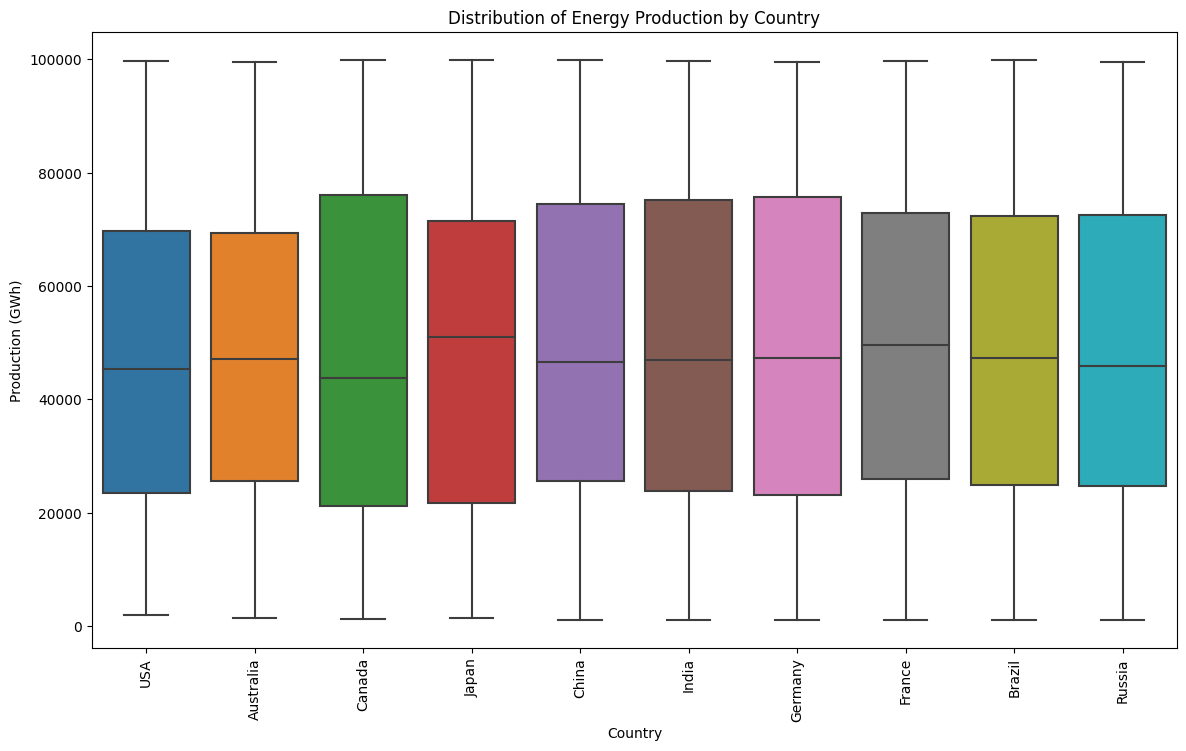

In [8]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Country', y='Production (GWh)')
plt.title('Distribution of Energy Production by Country')
plt.xticks(rotation=90)
plt.ylabel('Production (GWh)')
plt.show()

Further breakdown of energy production by energy type for each country.

In [9]:
#energy_order = ['Solar', 'Wind', 'Hydro', 'Biomass', 'Geothermal']
energy_order = df['Energy Type'].unique().tolist()
energy_order

['Solar', 'Geothermal', 'Biomass', 'Wind', 'Hydro']

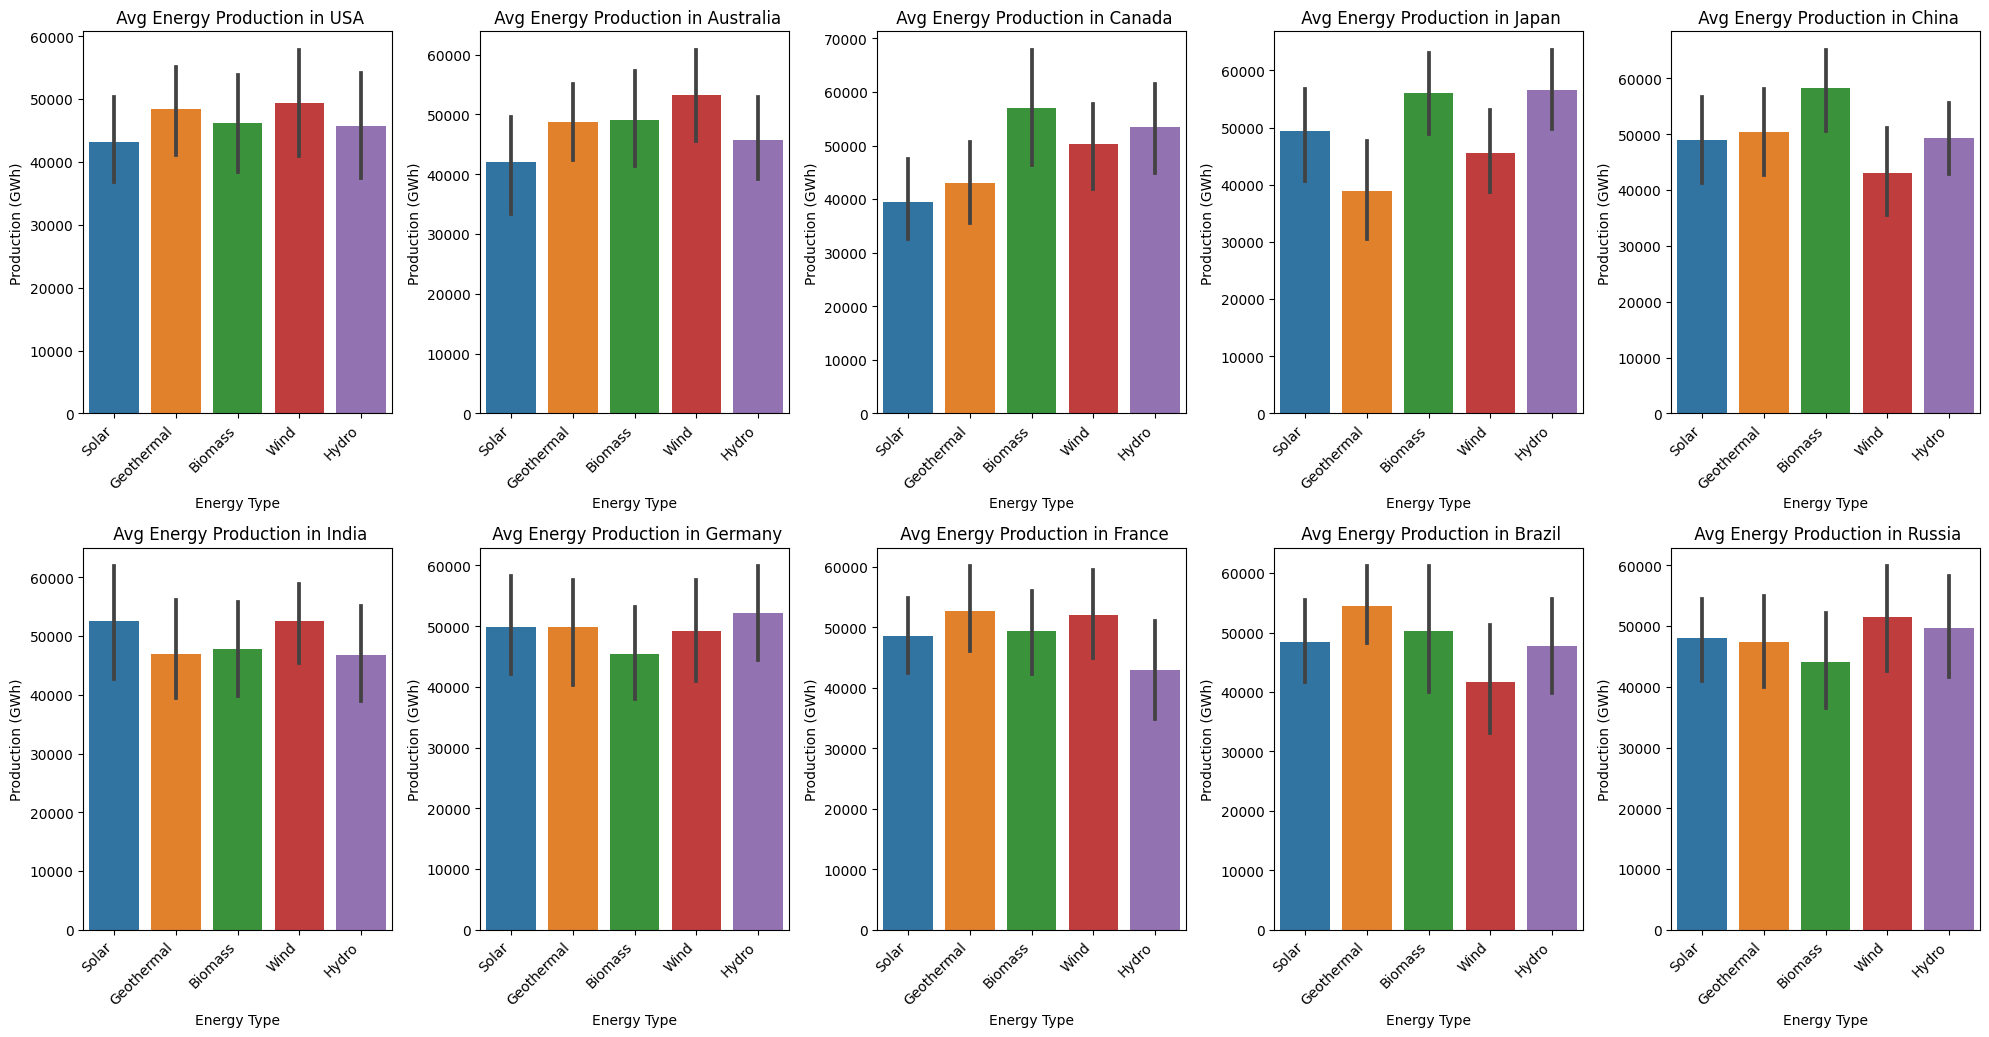

In [10]:
# Get unique countries and set up the subplot grid
countries = df['Country'].unique()
num_countries = len(countries)
#fig, axes = plt.subplots(nrows=(num_countries + 2) // 3, ncols=3, figsize=(15, 5 * ((num_countries + 2) // 3)))
fig, axes = plt.subplots(nrows= num_countries // 2, ncols=5, figsize=(20, 5 * (num_countries // 2)))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot for each country
for i, country in enumerate(countries):
    ax = axes[i]
    df_country = df[df['Country'] == country]
    sns.barplot(x='Energy Type', y='Production (GWh)', data=df_country, order=energy_order, ax=ax)
    ax.set_title(f' Avg Energy Production in {country}')
    ax.set_xlabel('Energy Type')
    ax.set_ylabel('Production (GWh)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

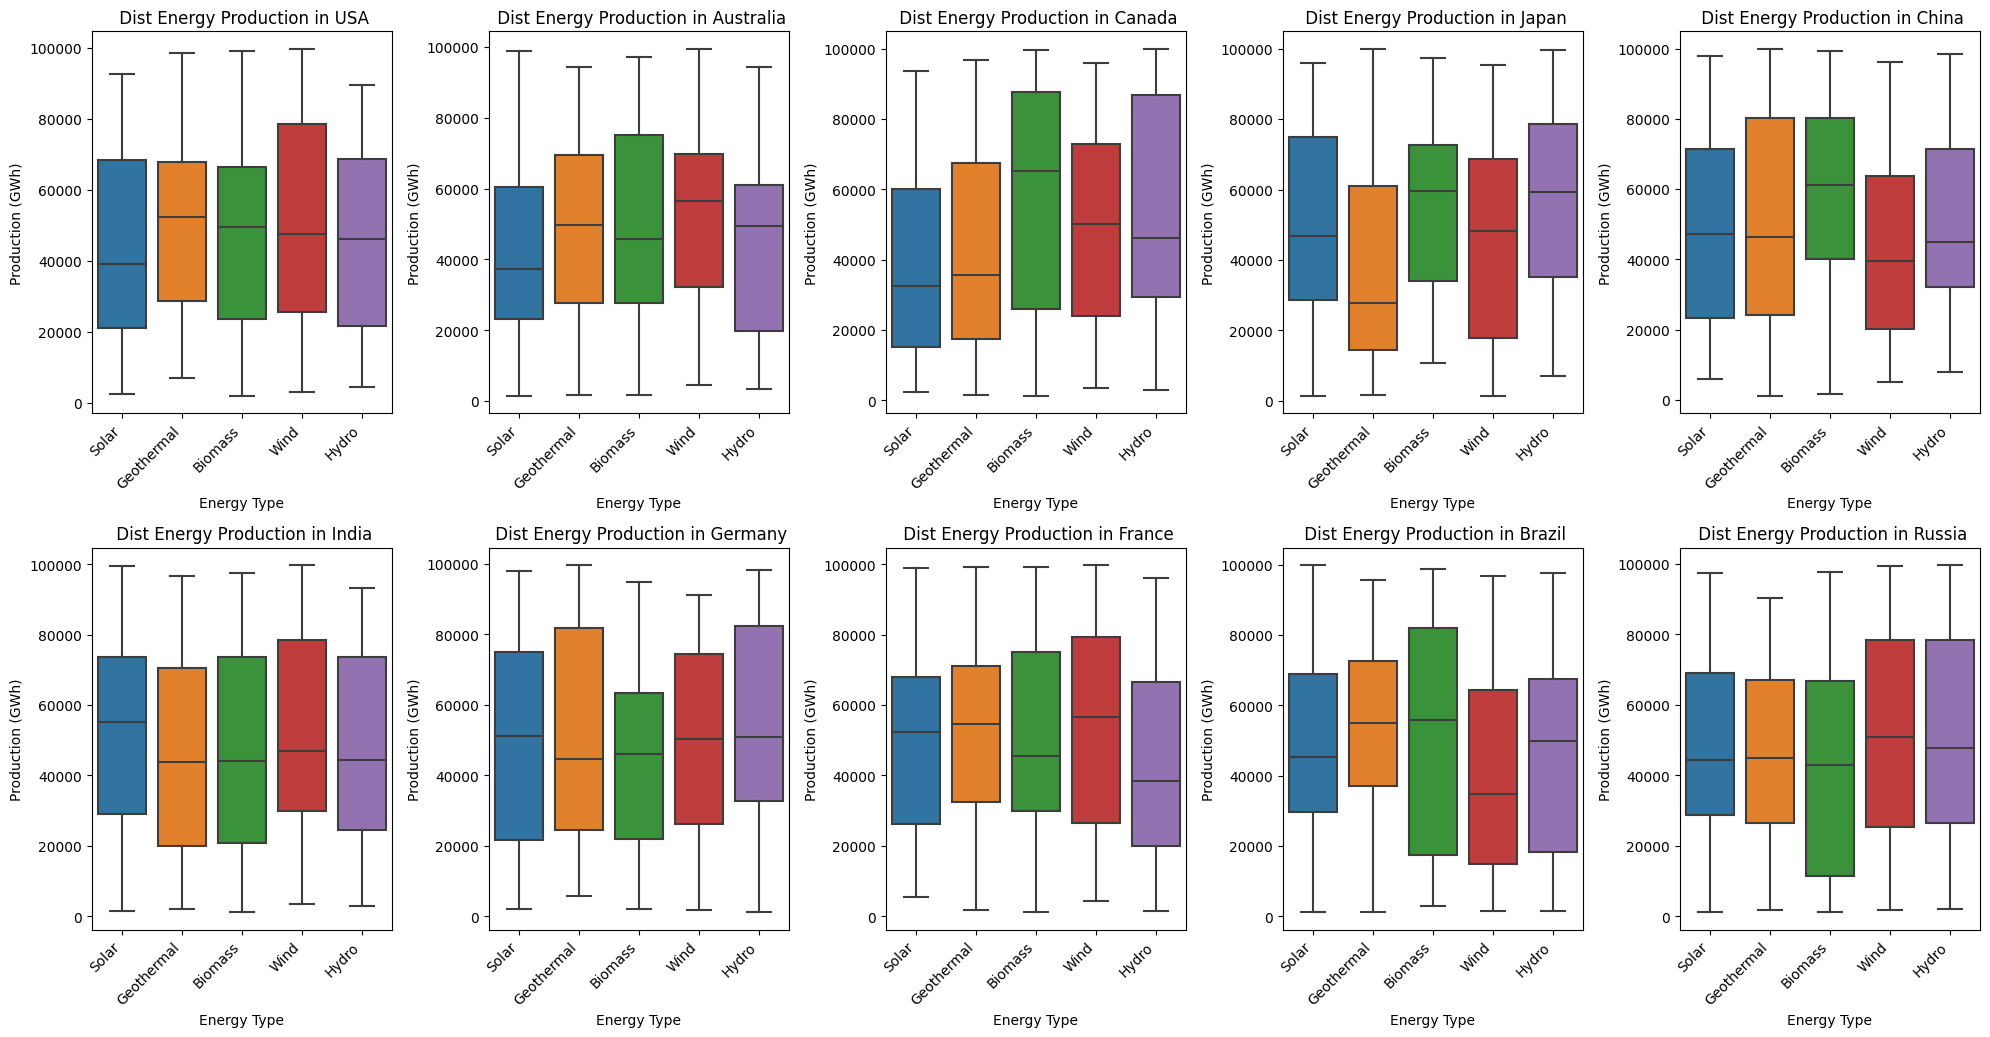

In [11]:
#fig, axes = plt.subplots(nrows=(num_countries + 2) // 3, ncols=3, figsize=(15, 5 * ((num_countries + 2) // 3)))
fig, axes = plt.subplots(nrows= num_countries // 2, ncols=5, figsize=(20, 5 * (num_countries // 2)))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot for each country
for i, country in enumerate(countries):
    ax = axes[i]
    df_country = df[df['Country'] == country]
    sns.boxplot(x='Energy Type', y='Production (GWh)', data=df_country, order=energy_order, ax=ax)
    ax.set_title(f' Dist Energy Production in {country}')
    ax.set_xlabel('Energy Type')
    ax.set_ylabel('Production (GWh)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The following figure is from @lightonkalumba notebook, which gives the average investment (USD) per country.

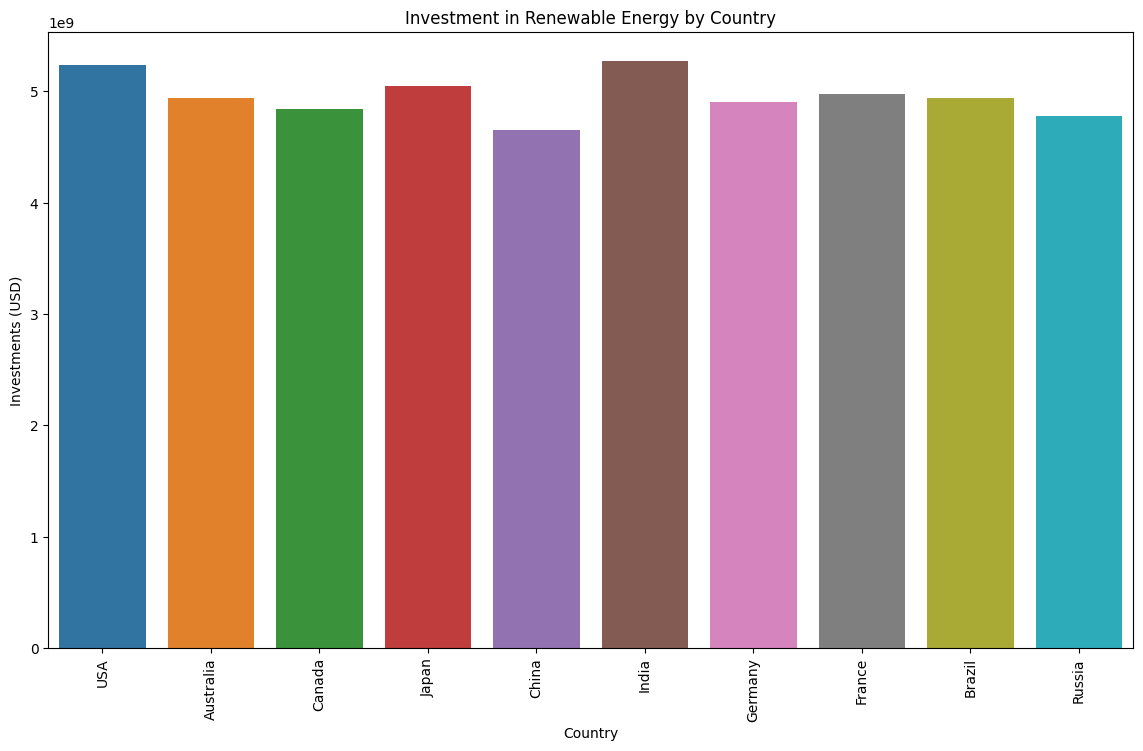

In [12]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Country', y='Investments (USD)', errorbar=None)
plt.title('Investment in Renewable Energy by Country')
plt.xticks(rotation=90)
plt.ylabel('Investments (USD)')
plt.show()

We can further compare (total) energy production and energy consumption by country. Lets look at USA example.

Production vs Energy Consumption per year in the USA.

In [13]:
df_USA = df.loc[df.Country == 'USA']
df_USA.head(10)

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
31,USA,2005,Wind,55487.022414,13187.616682,4.972808e+09,710170825,1.160719e+14,985035.710103,48007.275199,...,73.190026,27.681272,60.332998,220,95,9622,442797,57.057514,0,0
39,USA,2006,Hydro,21195.906636,34520.490610,9.333387e+09,51710882,2.802626e+13,82210.082536,49193.291240,...,85.752072,22.331396,83.063427,943,26,2979,569529,3.682494,1,0
52,USA,2014,Wind,10964.768790,18139.559117,1.066271e+09,1292204876,1.846752e+13,267626.780686,64471.760741,...,94.428391,73.100577,61.907810,221,54,9303,81664,44.765644,0,1
57,USA,2016,Hydro,71690.955005,45631.258916,6.479176e+09,643635950,6.848907e+12,564800.075362,55904.692161,...,91.894775,5.908946,10.367295,177,55,2382,294639,27.354661,1,0
91,USA,2020,Biomass,2016.882560,1409.725298,8.121393e+09,196283776,8.068881e+13,575817.545398,73126.760275,...,53.254121,28.939770,86.133834,42,3,8813,159733,8.329128,1,0
92,USA,2022,Solar,33851.850303,27673.258461,9.513058e+09,7940294,1.767641e+14,763942.895313,49028.204085,...,39.866682,73.880139,67.659440,40,75,5709,451849,68.740601,1,1
134,USA,2016,Solar,80231.395282,18019.469070,4.926187e+09,662628516,1.893437e+14,377298.993349,36604.480175,...,11.157439,38.901766,30.807881,763,35,6975,412227,38.893845,0,0
143,USA,2011,Hydro,21469.448391,1021.144123,7.412587e+09,415231934,1.056999e+14,690484.263418,47541.662027,...,73.113694,50.812730,50.935538,159,25,4907,149308,98.611484,1,1
156,USA,2014,Solar,89112.981992,43304.796800,2.616267e+09,1112686632,1.197760e+14,232802.150004,48959.205972,...,22.195256,43.657977,58.780568,162,51,9978,498123,8.083664,0,1


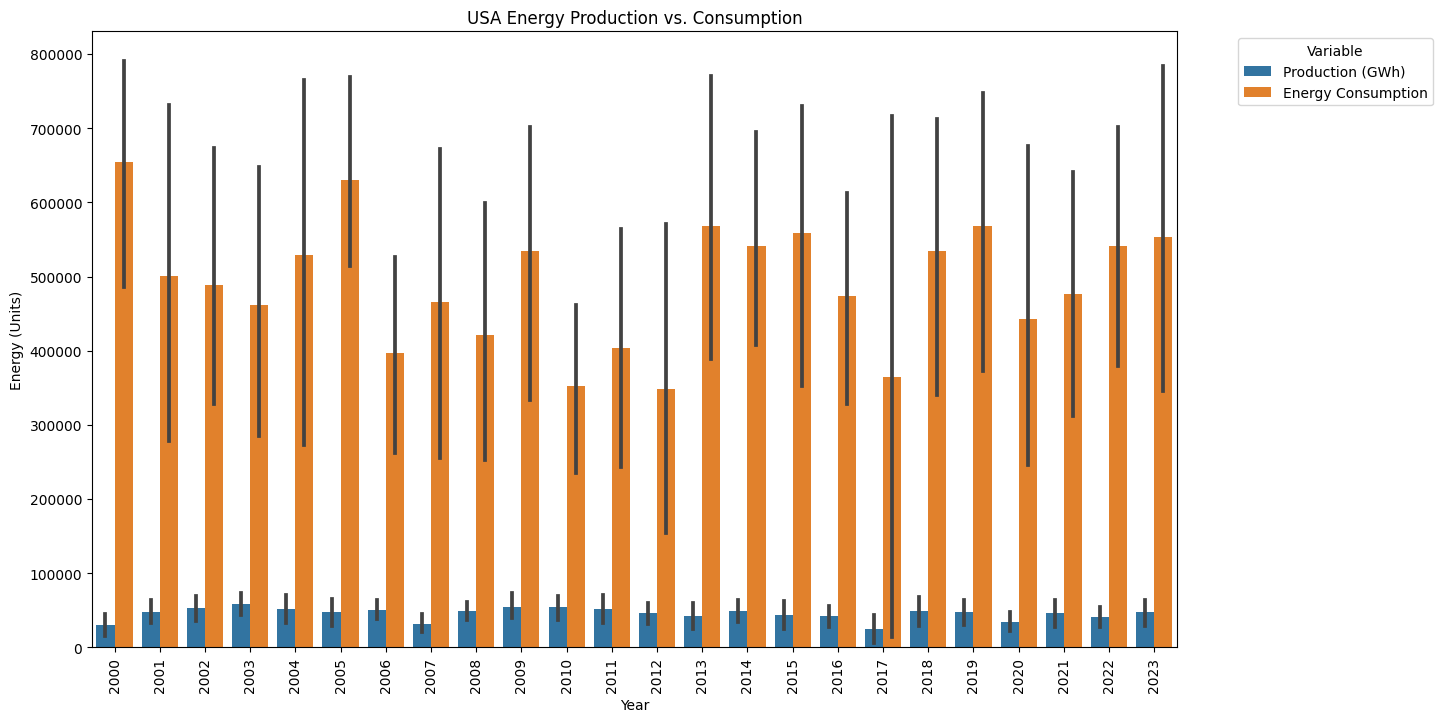

In [14]:
# convert the dataframe to a long format
df_USA_melted = pd.melt(df_USA, id_vars='Year', value_vars=['Production (GWh)', 'Energy Consumption'],var_name='Variable', value_name='Value') 

plt.figure(figsize=(14, 8))
sns.barplot(data=df_USA_melted, x='Year', y='Value', hue='Variable')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Energy (Units)')
plt.title('USA Energy Production vs. Consumption')
plt.legend(title='Variable', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

Why is consumption >> production? What exactly does the "Proportion of Energy from Renewables" column mean?

Investigate USA production further.

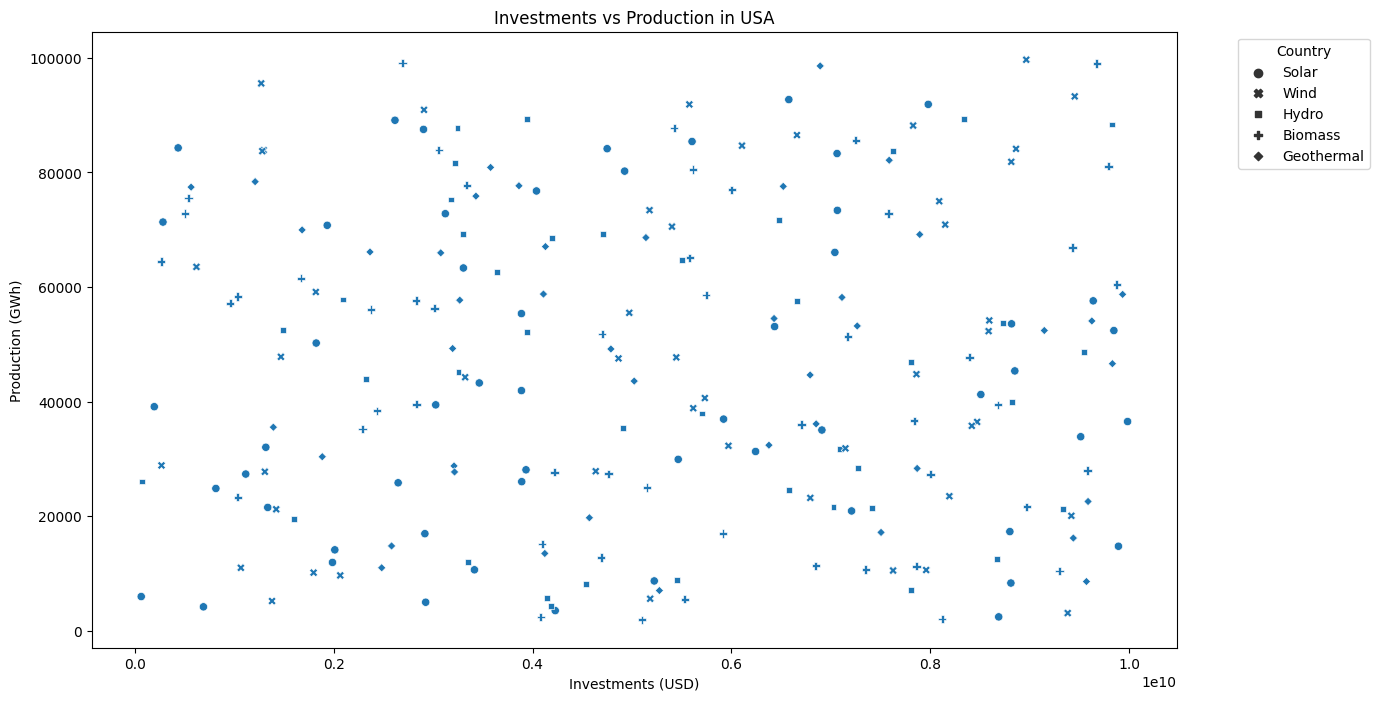

In [15]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_USA, x='Investments (USD)', y='Production (GWh)', style='Energy Type')
plt.title('Investments vs Production in USA')
plt.xlabel('Investments (USD)')
plt.ylabel('Production (GWh)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Breakdown by energy type to include a linear regression fit.

In [16]:
#plt.figure(figsize=(14, 8))
#sns.regplot(data=df_USA.loc[df_USA['Energy Type']== 'Solar'], x='Investments (USD)', y='Production (GWh)', ci=None)
#plt.title('Solar Energy Investments vs Production in USA')
#plt.xlabel('Investments (USD)')
#plt.ylabel('Production (GWh)')
#plt.show()


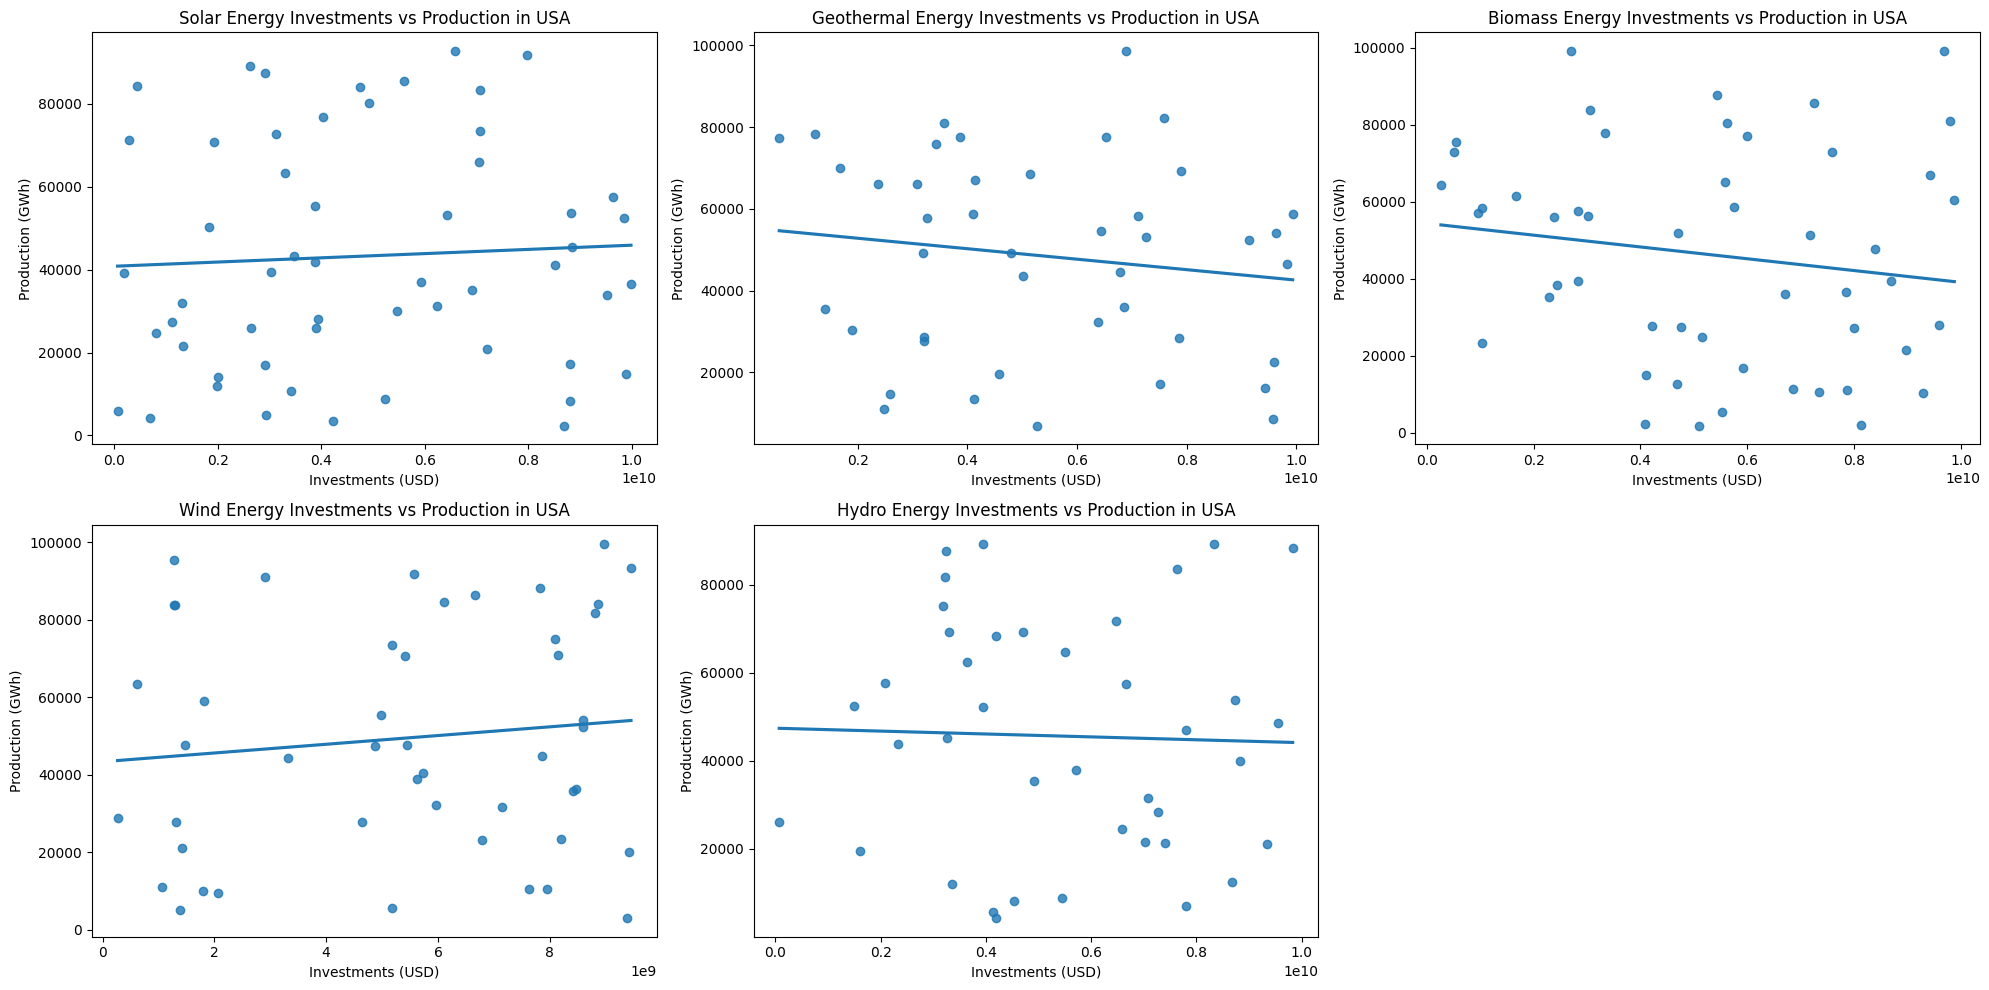

In [17]:
fig, axes = plt.subplots(nrows= 2, ncols=3, figsize=(20, 10))
axes = axes.flatten()  # Flatten the 2D array of axes

#Plot for each energy type
for i, energy_type in enumerate(energy_order):
    ax = axes[i]
    sns.regplot(data=df_USA.loc[df_USA['Energy Type']== energy_type], x='Investments (USD)', y='Production (GWh)', ci=None, ax=ax)
    ax.set_title(f'{energy_type} Energy Investments vs Production in USA')
    ax.set_xlabel('Investments (USD)')
    ax.set_ylabel('Production (GWh)')
    

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()    


Selecting a few variables to asses correlation. The variables are 'Production (GWh)', 'Investments (USD)', 'R&D Expenditure', 'Energy Sector Workforce' 

In [18]:
df1_USA = df_USA.loc[:, ['Production (GWh)', 'Investments (USD)', 'R&D Expenditure', 'Energy Sector Workforce' ]]
df1_USA.head(10)

,Production (GWh),Investments (USD),R&D Expenditure,Energy Sector Workforce
0,85404.690027,5.604125e+09,8.676561e+09,511658
31,55487.022414,4.972808e+09,6.633566e+09,442797
39,21195.906636,9.333387e+09,8.068504e+09,569529
52,10964.768790,1.066271e+09,8.760259e+09,81664
57,71690.955005,6.479176e+09,5.102718e+09,294639
91,2016.882560,8.121393e+09,1.241189e+09,159733
92,33851.850303,9.513058e+09,4.661780e+09,451849
134,80231.395282,4.926187e+09,7.010735e+09,412227
143,21469.448391,7.412587e+09,2.494097e+09,149308
156,89112.981992,2.616267e+09,3.065755e+09,498123


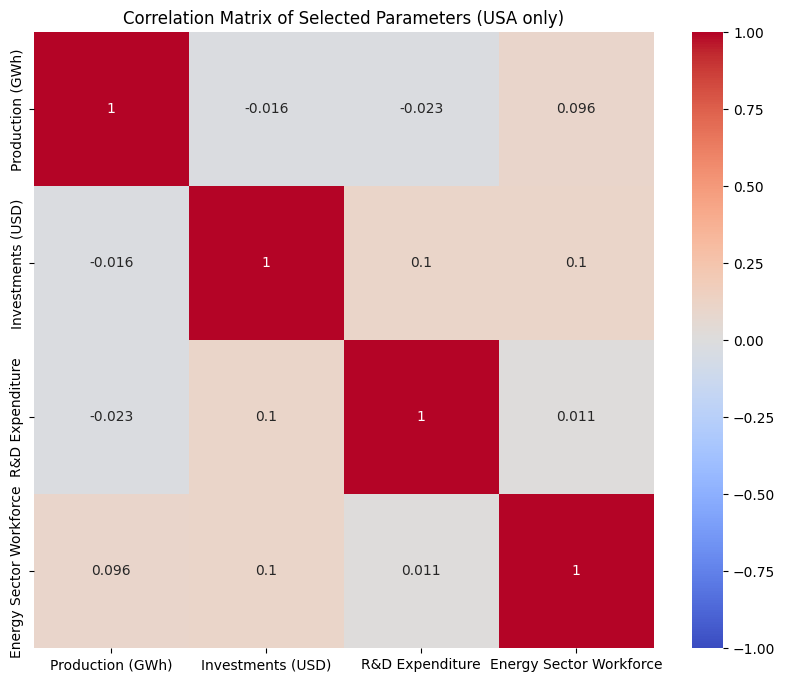

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

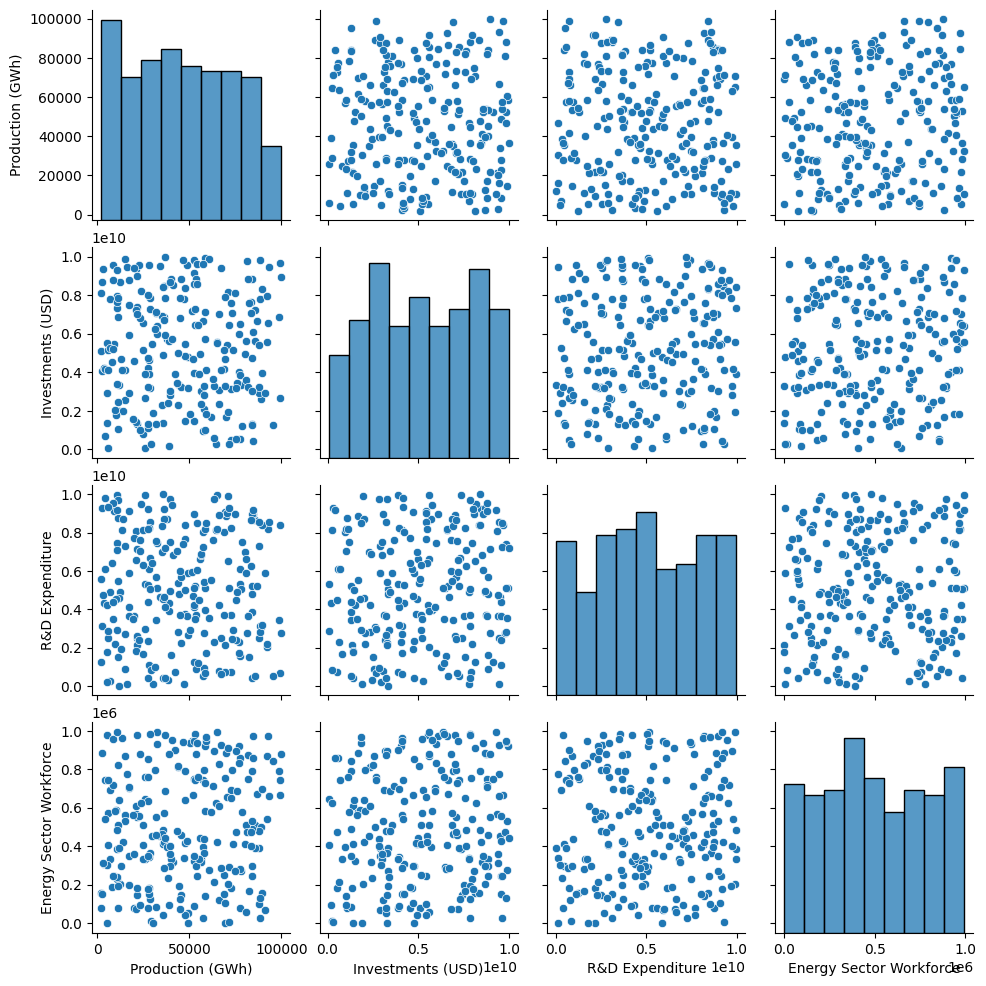

In [19]:
# Calculate correlation matrix
correlation_matrix = df1_USA.corr()
#print(correlation_matrix)

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Parameters (USA only)')
plt.show()

# Pair plot
sns.pairplot(df1_USA)
plt.show()

Strange that these variables are hardly correlated.